In [1]:
# !pip install pyarabic
# !pip install datasets
# !pip install transformers
# !pip install -U accelerate
# !pip install optuna
# !pip install shap

In [2]:
import pickle
import nltk
from pyarabic import araby
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datasets import Dataset
import numpy as np
import pandas as pd

In [3]:
with open('train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('4000_augmented_tweets_cleaned.pkl', 'rb') as f:
    Aug = pickle.load(f)

In [4]:
train_count = X_train[['Root Stemming', 'label']].groupby('label').count().values.squeeze()
train_count

array([1243, 1168, 1013,  998,  970,  868,  844,  948])

In [5]:
print(max(train_count) - train_count)

[  0  75 230 245 273 375 399 295]


In [6]:
indexes1 = np.random.choice(Aug[Aug.label==1].index.values, 75)
indexes2 = np.random.choice(Aug[Aug.label==2].index.values, 230)
indexes3 = np.random.choice(Aug[Aug.label==3].index.values, 245)
indexes4 = np.random.choice(Aug[Aug.label==4].index.values, 273)
indexes5 = np.random.choice(Aug[Aug.label==5].index.values, 375)
indexes6 = np.random.choice(Aug[Aug.label==6].index.values, 399)
indexes7 = np.random.choice(Aug[Aug.label==7].index.values, 295)

X_train = pd.concat([X_train, Aug.loc[indexes1]])
X_train = pd.concat([X_train, Aug.loc[indexes2]])
X_train = pd.concat([X_train, Aug.loc[indexes3]])
X_train = pd.concat([X_train, Aug.loc[indexes4]])
X_train = pd.concat([X_train, Aug.loc[indexes5]])
X_train = pd.concat([X_train, Aug.loc[indexes6]])
X_train = pd.concat([X_train, Aug.loc[indexes7]])

In [7]:
train_count = X_train[['Root Stemming', 'label']].groupby('label').count().values.squeeze()
train_count

array([1243, 1243, 1243, 1243, 1243, 1243, 1243, 1243])

In [8]:
print(max(train_count) - train_count)

[0 0 0 0 0 0 0 0]


In [9]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

classes = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

In [10]:
X_train.head()

,tweet,label,tweet_with_out_emojis,cleaned_data,Light Stemming,Root Stemming
1426,شايف نفسه الحمار مع انه كان احتياط الموسم الما...,1,شايف نفسه الحمار مع انه كان احتياط الموسم الما...,شايف الحمار انه احتياط الموسم الماضي اليوفي اد...,شايف حمار انه احتياط موسم ماضي يوفي اداره ريال...,شيف حمر انه حيط وسم اضي يوف دره ريل امر غرب هج...
496,: هزق البلد كلها ..مرتضي محدش عارف يوقفه ..ل...,1,: هزق البلد كلها ..مرتضي محدش عارف يوقفه ..ل...,هزق البلد مرتضي محدش عارف يوقفه لا وزير داخليه...,هزق بلد مرتضي محدش عارف يوقفه لا وزير داخليه ش...,هزق بلد رضي حدش عرف وقف لا وزر دخل شبب حتي بتع...
3464,استفتاء : عندما تنتهي الاوليمبياد وتعود بعثتنا...,0,استفتاء : عندما تنتهي الاوليمبياد وتعود بعثتنا...,استفتاء تنتهي الاوليمبياد وتعود بعثتنا بالسلام...,استفتاء تنتهي اوليمبياد وتعود بعثت سلامه ميدال...,فاء نهي اوليمبياد تعد بعث سلم يدل حصل وجه نظر
7073,Alhashemلا يوجد مخرج لنفط داعش سوي تركيا.هكذا ...,1,Alhashemلا يوجد مخرج لنفط داعش سوي تركيا.هكذا ...,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول الجغ...,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول جغرا...,لا وجد خرج نفط دعش سوي تركياهكذا تقل جغراف سؤل...
758,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,7,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,ما احب اركب جاهل معاي سياره عادي اتوتر طول ما ...,ما احب ركب جهل عاي سير عدي وتر طول ما انا اسق ...


In [11]:
X_train['length'] = X_train['Light Stemming'].apply(lambda x:len(araby.tokenize(x)))

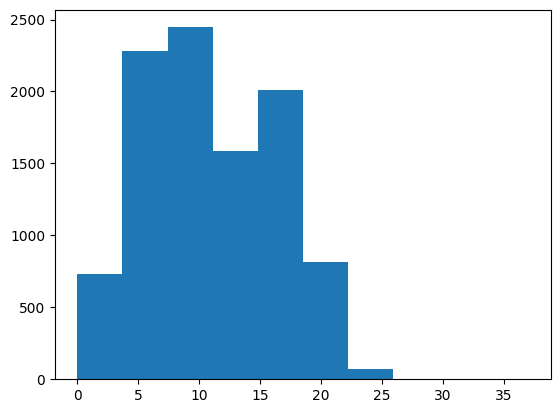

In [12]:
#histogram of tweets lengthes
plt.hist(X_train['length'])
plt.show()

In [13]:
sorted(X_train.query("length > 25")['length'].values)

[26, 26, 26, 35, 37]

In [14]:
X_train = X_train[['tweet', 'Light Stemming', 'label']]
y_train = X_train['label']
X_test = X_test[['tweet', 'Light Stemming', 'label']]
y_test = X_test['label']

In [15]:
X_train.shape, X_test.shape

((9944, 3), (2013, 3))

In [16]:
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, shuffle=True, test_size=0.5)

In [17]:
X_test.shape, X_dev.shape

((1006, 3), (1007, 3))

In [18]:
X_train

,tweet,Light Stemming,label
1426,شايف نفسه الحمار مع انه كان احتياط الموسم الما...,شايف حمار انه احتياط موسم ماضي يوفي اداره ريال...,1
496,: هزق البلد كلها ..مرتضي محدش عارف يوقفه ..ل...,هزق بلد مرتضي محدش عارف يوقفه لا وزير داخليه ش...,1
3464,استفتاء : عندما تنتهي الاوليمبياد وتعود بعثتنا...,استفتاء تنتهي اوليمبياد وتعود بعثت سلامه ميدال...,0
7073,Alhashemلا يوجد مخرج لنفط داعش سوي تركيا.هكذا ...,لا يوجد مخرج لنفط داعش سوي تركياهكذا تقول جغرا...,1
758,ما احب اركب جاهل معاي السياره عادي اتوتر طول م...,ما احب اركب جاهل معاي سياره عادي اتوتر طول ما ...,7
...,...,...,...
3968,['هما مستنيين ايه السهره ما الاوليمبياد يخلص'],هما مستن ايه سهره ما اوليمبياد يخلص,7
3655,['الناس خايفه مش عارف ايه'],ناس خايفه مش عارف ايه,7
3539,['خايف انام تاني'],خايف انام تاني,7
3961,['والله اني خوفي يتكرر سيناريو مباراه الليله ا...,والله اني خوفي يتكرر سيناريو مباراه ليله اهلي ...,7


In [19]:
X_train = X_train.rename_axis('id')
X_test = X_test.rename_axis('id')
X_dev = X_dev.rename_axis('id')

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_dev = X_dev.reset_index(drop=True)

In [20]:
X_train = Dataset.from_pandas(X_train)
X_test = Dataset.from_pandas(X_test)
X_dev = Dataset.from_pandas(X_dev)
X_train, X_test, X_dev

(Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 9944
 }),
 Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 1006
 }),
 Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 1007
 }))

In [21]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = "hatemnoaman/bert-base-arabic-finetuned-emotion"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [22]:
model_init = lambda: AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)

In [23]:
def tokenize_function(examples):
    return tokenizer(examples["Light Stemming"], padding="max_length", truncation=True, max_length=37)

X_train = X_train.map(tokenize_function, batched=True, num_proc = 8)
X_dev = X_test.map(tokenize_function, batched=True, num_proc = 8)
X_test = X_test.map(tokenize_function, batched=True, num_proc = 8)

Map (num_proc=8):   0%|          | 0/9944 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1006 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1006 [00:00<?, ? examples/s]

In [24]:
X_train

Dataset({
    features: ['tweet', 'Light Stemming', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 9944
})

In [25]:
import numpy as np
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             confusion_matrix,
                             precision_score,
                             recall_score
                             )

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)

    macro_f1 = f1_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_precision = precision_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_recall = recall_score(p.label_ids,preds,average='macro', zero_division=1)
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'accuracy': acc
    }

In [26]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback, IntervalStrategy

batch_size = 32
logging_steps = 100

training_args = TrainingArguments(output_dir="./train")
training_args.do_train = True
training_args.evaluate_during_training = True
# training_args.per_device_train_batch_size = batch_size
# training_args.per_device_eval_batch_size = batch_size
training_args.evaluation_strategy = IntervalStrategy.STEPS
# training_args.num_train_epochs = num_epochs
training_args.logging_steps = logging_steps
training_args.eval_steps = logging_steps
training_args.save_steps = 500
training_args.save_total_limit = 5
# training_args.seed = 42
training_args.load_best_model_at_end=True
training_args.metric_for_best_model = 'macro_f1'

In [27]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_dev,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [28]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")
best_run

[I 2023-08-08 22:08:13,622] A new study created in memory with name: no-name-f46f752d-2136-4d62-b706-4f35ff8f707d
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.019300,0.793981,0.730999,0.742934,0.725718,0.731610
200,0.869700,0.813400,0.716001,0.736543,0.722656,0.724652
300,0.844800,0.797241,0.707649,0.738576,0.718436,0.723658
400,0.722000,0.701747,0.749302,0.762882,0.749959,0.757455
500,0.722700,0.699206,0.753182,0.761863,0.753168,0.757455
600,0.689900,0.682179,0.767313,0.771621,0.769918,0.770378


[I 2023-08-08 22:10:10,033] Trial 0 finished with value: 3.0792288794078164 and parameters: {'learning_rate': 5.4483381920433735e-05, 'num_train_epochs': 1, 'seed': 16, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 3.0792288794078164.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.729400,0.620854,0.790481,0.806099,0.790060,0.794235
200,0.687100,0.610333,0.788412,0.793317,0.791655,0.795229
300,0.655200,0.581133,0.800953,0.809832,0.802689,0.806163
400,0.486400,0.588430,0.799930,0.800969,0.801434,0.800199
500,0.436400,0.583005,0.800122,0.805679,0.801315,0.803181
600,0.441200,0.585220,0.807663,0.815417,0.803667,0.808151
700,0.336900,0.580790,0.812108,0.818551,0.809897,0.813121
800,0.317100,0.601721,0.804288,0.805426,0.805733,0.804175


[I 2023-08-08 22:13:40,362] Trial 1 finished with value: 3.2196216235014505 and parameters: {'learning_rate': 1.3988348476185095e-05, 'num_train_epochs': 3, 'seed': 2, 'per_device_train_batch_size': 32}. Best is trial 1 with value: 3.2196216235014505.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.796100,0.678025,0.768305,0.790845,0.771079,0.770378
200,0.708500,0.581537,0.799874,0.805437,0.799356,0.803181
300,0.721400,0.588637,0.804489,0.809277,0.804127,0.807157
400,0.658900,0.603733,0.798833,0.799440,0.802945,0.799205
500,0.660400,0.576151,0.790631,0.797941,0.787897,0.793241
600,0.644600,0.584540,0.788337,0.797578,0.789572,0.788270
700,0.487300,0.565231,0.798158,0.798582,0.800295,0.798211
800,0.462400,0.573607,0.802435,0.803543,0.805195,0.805169
900,0.466500,0.578866,0.812546,0.813497,0.814024,0.814115


[I 2023-08-08 22:16:20,693] Trial 2 finished with value: 3.2541823827487857 and parameters: {'learning_rate': 9.000925969917918e-06, 'num_train_epochs': 3, 'seed': 13, 'per_device_train_batch_size': 16}. Best is trial 2 with value: 3.2541823827487857.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.844300,0.736727,0.745512,0.765097,0.740349,0.746521
200,0.768700,0.738671,0.752736,0.763089,0.761076,0.758449
300,0.816600,0.827757,0.739916,0.765053,0.737356,0.743539
400,0.797600,0.775898,0.750987,0.774640,0.755005,0.760437
500,0.783700,0.717146,0.761189,0.780832,0.762984,0.764414
600,0.650800,0.705325,0.787541,0.802418,0.789351,0.793241
700,0.778000,0.748094,0.766460,0.773754,0.770494,0.771372
800,0.890900,0.684735,0.770117,0.783350,0.764887,0.769384


[I 2023-08-08 22:17:54,896] Trial 3 finished with value: 3.087737841203592 and parameters: {'learning_rate': 1.028078028580283e-05, 'num_train_epochs': 3, 'seed': 37, 'per_device_train_batch_size': 4}. Best is trial 2 with value: 3.2541823827487857.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.051300,1.087749,0.668035,0.719575,0.671685,0.675944
200,0.975600,1.230216,0.602080,0.700090,0.605193,0.618290
300,0.969600,0.880874,0.687780,0.714261,0.698459,0.701789
400,0.946100,1.099101,0.647981,0.687255,0.661143,0.658052
500,1.055100,0.999025,0.665748,0.680428,0.681993,0.674950
600,0.916000,1.266705,0.632804,0.712924,0.651711,0.660040
700,0.949100,1.187752,0.666446,0.709148,0.676270,0.671968
800,0.962200,0.946811,0.703688,0.727967,0.697165,0.703777
900,0.823500,0.970601,0.682325,0.703523,0.691733,0.692843


[I 2023-08-08 22:19:53,217] Trial 4 finished with value: 2.7704244845477746 and parameters: {'learning_rate': 3.382155151972955e-05, 'num_train_epochs': 3, 'seed': 8, 'per_device_train_batch_size': 4}. Best is trial 2 with value: 3.2541823827487857.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.771800,0.593786,0.789167,0.792752,0.787763,0.792247
200,0.683900,0.594861,0.789500,0.796639,0.788734,0.788270
300,0.622100,0.593536,0.788691,0.795609,0.789587,0.791252
400,0.497700,0.578370,0.803967,0.807074,0.804273,0.806163
500,0.407100,0.583622,0.801588,0.803561,0.802983,0.803181
600,0.417700,0.577009,0.800940,0.802769,0.800745,0.801193


[I 2023-08-08 22:22:39,117] Trial 5 finished with value: 3.2056472534691616 and parameters: {'learning_rate': 1.5085269645491101e-05, 'num_train_epochs': 2, 'seed': 29, 'per_device_train_batch_size': 32}. Best is trial 2 with value: 3.2541823827487857.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.725300,0.620250,0.795231,0.800708,0.792053,0.797217
200,0.688400,0.613060,0.794231,0.801408,0.792280,0.798211
300,0.848300,0.609740,0.794728,0.798053,0.795485,0.800199
400,0.749800,0.614734,0.788819,0.791669,0.791029,0.795229
500,0.692500,0.612992,0.802124,0.808881,0.803596,0.808151
600,0.754500,0.592991,0.797466,0.802256,0.796277,0.801193
700,0.634000,0.589758,0.793973,0.797082,0.792977,0.797217
800,0.667600,0.609705,0.786606,0.789206,0.788172,0.792247
900,0.637600,0.614434,0.792884,0.797830,0.794798,0.799205
1000,0.662600,0.605248,0.795608,0.797057,0.798093,0.800199


[I 2023-08-08 22:26:19,276] Trial 6 finished with value: 3.1910267904626375 and parameters: {'learning_rate': 1.2872517337459092e-06, 'num_train_epochs': 4, 'seed': 18, 'per_device_train_batch_size': 4}. Best is trial 2 with value: 3.2541823827487857.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.812400,0.681056,0.762967,0.773544,0.761464,0.763419


[I 2023-08-08 22:26:45,892] Trial 7 pruned. 
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.720900,0.596463,0.796605,0.797539,0.797786,0.801193
200,0.759100,0.595428,0.800839,0.809884,0.796502,0.804175
300,0.685500,0.580024,0.796103,0.797194,0.797715,0.801193
400,0.698900,0.582070,0.799089,0.801157,0.798302,0.801193
500,0.671400,0.571745,0.796663,0.798113,0.796328,0.800199
600,0.710300,0.575160,0.794597,0.794831,0.795834,0.799205
700,0.717500,0.568320,0.799153,0.800075,0.800366,0.804175
800,0.695300,0.566978,0.794125,0.795259,0.794654,0.798211
900,0.637300,0.567362,0.784930,0.785694,0.785482,0.789264
1000,0.645100,0.565052,0.790557,0.792414,0.790779,0.795229


[I 2023-08-08 22:29:35,538] Trial 8 finished with value: 3.163355956984706 and parameters: {'learning_rate': 1.3223141874360207e-06, 'num_train_epochs': 1, 'seed': 20, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 3.2541823827487857.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.858300,0.641478,0.774945,0.782033,0.773262,0.775348


[I 2023-08-08 22:29:47,635] Trial 9 pruned. 


BestRun(run_id='2', objective=3.2541823827487857, hyperparameters={'learning_rate': 9.000925969917918e-06, 'num_train_epochs': 3, 'seed': 13, 'per_device_train_batch_size': 16}, run_summary=None)

In [29]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,0.796100,0.678025,0.768305,0.790845,0.771079,0.770378
200,0.708500,0.581537,0.799874,0.805437,0.799356,0.803181
300,0.721400,0.588637,0.804489,0.809277,0.804127,0.807157
400,0.658900,0.603733,0.798833,0.799440,0.802945,0.799205
500,0.660400,0.576151,0.790631,0.797941,0.787897,0.793241
600,0.644600,0.584540,0.788337,0.797578,0.789572,0.788270
700,0.487300,0.565231,0.798158,0.798582,0.800295,0.798211
800,0.462400,0.573607,0.802435,0.803543,0.805195,0.805169
900,0.466500,0.578866,0.812546,0.813497,0.814024,0.814115


TrainOutput(global_step=900, training_loss=0.6229130511813693, metrics={'train_runtime': 149.5772, 'train_samples_per_second': 199.442, 'train_steps_per_second': 12.475, 'total_flos': 273662572745856.0, 'train_loss': 0.6229130511813693, 'epoch': 1.45})

In [30]:
trainer.evaluate()

{'eval_loss': 0.5761512517929077,
 'eval_macro_f1': 0.7906305920741974,
 'eval_macro_precision': 0.7979409737095808,
 'eval_macro_recall': 0.7878965624986951,
 'eval_accuracy': 0.7932405566600398,
 'eval_runtime': 2.5568,
 'eval_samples_per_second': 393.461,
 'eval_steps_per_second': 49.28,
 'epoch': 1.45}

In [31]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [32]:
X_test

Dataset({
    features: ['tweet', 'Light Stemming', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1006
})

In [33]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_test]
attention_masks = [i['attention_mask'] for i in X_test]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
test_data = TensorDataset(inputs, masks)

test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [34]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

outputs = []
for input, masks in test_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    outputs.extend(predictions)

print(classification_report(X_test['label'], outputs, target_names=classes))

              precision    recall  f1-score   support

        none       0.78      0.87      0.82       154
       anger       0.80      0.90      0.84       147
         joy       0.67      0.73      0.70       129
     sadness       0.77      0.62      0.69       132
        love       0.86      0.81      0.83       124
    sympathy       0.91      0.84      0.87        86
    surprise       0.64      0.62      0.63       105
        fear       0.95      0.92      0.94       129

    accuracy                           0.79      1006
   macro avg       0.80      0.79      0.79      1006
weighted avg       0.80      0.79      0.79      1006



In [35]:
from transformers import pipeline

# build a pipeline object to do predictions
pred = pipeline("text-classification", model=trainer.model, tokenizer=tokenizer, device=0, top_k=None)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


#SHAP

In [36]:
import shap
shap.initjs()

explainer = shap.Explainer(pred, output_names=classes)

In [37]:
X_train

Dataset({
    features: ['tweet', 'Light Stemming', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 9944
})

In [38]:
example1_index = 1

print(X_train['tweet'][example1_index])
sv1 = explainer(X_train['Light Stemming'][example1_index:example1_index+1])
shap.plots.text(sv1)

:   هزق البلد كلها ..مرتضي محدش عارف يوقفه ..لا وزير داخليه ولا شباب ولا حتي بتوع التلفزيون


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
